<span style="font-size: 6px; float:right">Notebook created by Mieszko Fraś
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>IIR Filters</u></b></font></center>


My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebooke, please annouce theirs names below.
- Michał Woźniak
- Adrian Kortyla

# Introduction

The infinite impulse response (IIR) filter is a recursive filter in that the output from the filter is computed by using the current and previous inputs and previous outputs. In this notebook you will have to implement a few exercises that will help you get acquainted with the subject of IIR filters.

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **11.1 Wymagania stawiane filtrom cyfrowym** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **11.3 Metoda niezmienności odpowiedzi impulsowej** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **11.5 Metoda rtansformacji biliniowej** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>


# Necessary imports

You should not import anything else in order to complete exercises in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Practical problem set

## BIBO Stability

The transfer function allows us to judge whether or not a system instable. To be specific, the  stability criteria requires that the [ROC](https://en.wikipedia.org/wiki/Infinite_impulse_response#Stability) of the system includes the unit circle. For example, for a causal system, all poles of the transfer function have to have an absolute value smaller than one. In other words, all poles must be located within a unit circle in the plane.

### Exercise

Implement function that will check if IIR filter is stable.

In [2]:
def check_stability(de,no):
    """
    This function checks stability of a filter.
    
    Parameters
    ----------
    de: numpy array containing denominator-mianownik of IIR transmitance.
    no: numpy array containing nominator-licznik of IIR transmitance.

    Returns
    -------
    True or False (or 1/0)
    
    """
    
    Z = np.abs(np.roots(de)) # wartość bezwzględna miejsc zerowych mianownika
    
    for n in range(0,len(Z)):
        if(Z[n]>1):
            return False
    return True

Verify your implementation:

In [3]:
# Stable filter design
no1, de1 = sig.iirfilter(3, [0.6, 0.7], btype = 'bandpass')

# Unstable filter design
no2, de2 = sig.iirfilter(84, 0.5, btype = 'lowpass')

# Checking stability using your implementation
stable = check_stability(de1,no1)
unstable = check_stability(de2,no2)

print('Your result for a stable filter is: ', stable, '\nYour result for an unstable filter is: ', unstable)
print('Your implementation succeeded' if stable and not unstable else 'Your implementation doesn`t work correctly')

Your result for a stable filter is:  True 
Your result for an unstable filter is:  False
Your implementation succeeded


## IIR Frequency response

Frequency response of the IIR filter can be calculated using following formula:

$$ \large
h(f_{n}) = \frac{\sum_{n=0}^{N} b_{n} e^{{-j2\pi nf_n}}}{1+\sum_{n=1}^{N} a_{n} e^{{-j2\pi nf_n}}}
$$ where:
- $a(n)$ is n`th coefficient of the denominator of the filter transmitance
- $b(n)$ is n`th coefficient of the numinator of the filter transmitance
- $f_n$ is normalized frequency from 0 to 1
- $N$ is number of points at which frequency response will be calculated

### Exercise

Implement a funtion that will calculate frequency response of an IIR filter in a given number of points using above formula. Frequency response should be calculated only from 0 to Nyquist frequency!

In [4]:
def freqz(no, de, worN=512):
    """
    This function calculate frequency response of an IIR filter.
    
    Parameters
    ----------
    de: numpy array containing denominator-mianownik of IIR transmitance.
    no: numpy array containing nominator-licznik of FIR transmitance.
    worN: int containing number of samples at which frequency response is calculated.
    
    Returns
    -------
    h: nupy array containing frequency response of a filter
    
    """  
    ########## Your code is here ##########
    
    N=2*worN # N punktów dla fs # worN dla fs/2
    f = np.arange(0,N,1)
    fnorm = []
    for i in range(0,int(N)):
        fnorm.append((f[i]/N))
    
    licznik = []
    for fn in range(int(N/2)):
        sum = 0
        for n in range(0,len(no)):
            sum += no[n] * np.exp(-2j * np.pi * n * fnorm[fn])
        licznik.append(sum)
    licznik = np.array(licznik) 
        
    mianownik = []
    for fn in range(int(N/2)):
        sum = 0
        for n in range(1,len(no)):
            sum += de[n] * np.exp(-2j * np.pi * n * fnorm[fn])
        sum = sum + 1
        mianownik.append(sum)
    mianownik = np.array(mianownik) 
    
    h = licznik/mianownik

    return h

Verify your implementation.

Your implementation succeeded!


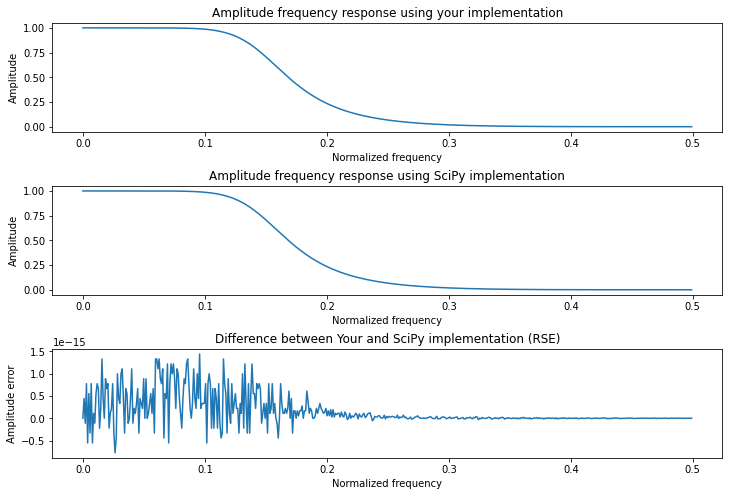

In [5]:
# IIR filter design
no, de = sig.iirfilter(4, 0.3, btype = 'lowpass')

# Calculating frequency response using your implementation
h = freqz(no, de, 512)
# Normalization
h = h / np.max(np.abs(h[0]))

# Calculating frequency response using SciPy implementation
w, h_ref = sig.freqz(no, de)
# Normalization
h_ref = h_ref / np.max(np.abs(h_ref[0]))

# Calculating error
RMSE = np.sum(np.abs(h) - np.abs(h_ref))

print('Your implementation succeeded!' if RMSE < 1 else 'Error is a little to big')

plt.figure(figsize = (12,8))

plt.subplot(3,1,1)
plt.plot(w/np.pi/2, np.abs(h))
plt.xlabel('Normalized frequency' )
plt.ylabel('Amplitude')
plt.title('Amplitude frequency response using your implementation')

plt.subplot(3,1,2)
plt.plot(w/np.pi/2, np.abs(h_ref))
plt.xlabel('Normalized frequency' )
plt.ylabel('Amplitude')
plt.title('Amplitude frequency response using SciPy implementation')

plt.subplot(3,1,3)
plt.plot(w/np.pi/2, np.abs(h_ref) - np.abs(h))
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude error')
plt.title('Difference between Your and SciPy implementation (RSE)')

plt.subplots_adjust(hspace=0.5)
plt.show()

## IIR impulse response

In [6]:
def draw_IIR(de, no, nsamples):
    """
    This function draws IIR impulse response, frequency amplitude response and poles and zeros on the z-plane.
    This function uses Your implementation of check_stability and freqz functions!!!
    
    Parameters
    ----------
    de: numpy array containing denominator of IIR transmitance.
    no: numpy array containing nominator of FIR transmitance.
    nsamples: int containing number of samples at which impulse response is calculated.    
    """
    print('\nDrawing begin, filter is stable. \n' if check_stability(de,no) else '\nDrawing begin, filter is unstable. \n')
    
    # Ploting zeros and poles
    zeros, poles, gain = sig.tf2zpk(no, de)
    t = np.linspace(0, 2*np.pi, 200)
    axes = np.max((np.max(np.abs(zeros)), np.max(np.abs(poles)), 1.5))
    
    plt.figure(figsize = (18,12))
    
    # Ploting unit circle zeros and poles
    plt.subplot(1,2,2)
    plt.plot(np.cos(t), np.sin(t), 'c--', linewidth=2)
    plt.plot(np.real(zeros), np.imag(zeros), 'ro', linewidth=4)
    plt.plot(np.real(poles), np.imag(poles), 'bx', linewidth=4)
    plt.xlabel('Imagine part')
    plt.ylabel('Real part')
    plt.legend(('Unit cicle', 'Zeros', 'Poles'))
    plt.xlim(-axes, axes)
    plt.ylim(-1.5*axes, 1.5*axes)
    
    # Ploting impulse response
    times = np.linspace(0,nsamples,100)
    IR = np.array(sig.impulse((no, de), T=times))
    
    plt.subplot(2,2,1)
    plt.plot(IR[0], IR[1])
    plt.title('Filter impulse response')
    plt.xlabel('Time in samples')
    plt.ylabel('Amplitudes')
    
    # Ploting frequency response
    h = freqz(no,de,512)
    t = np.linspace(0,0.5,512)
    
    plt.subplot(2,2,3)
    plt.plot(t, np.abs(h))
    plt.title('Filter frequency amplitude response')
    plt.xlabel('Normalized frequency')
    plt.ylabel('Amplitudes')
    plt.show()
    
    print('\nDrawing finished\n')
    return


Drawing begin, filter is stable. 



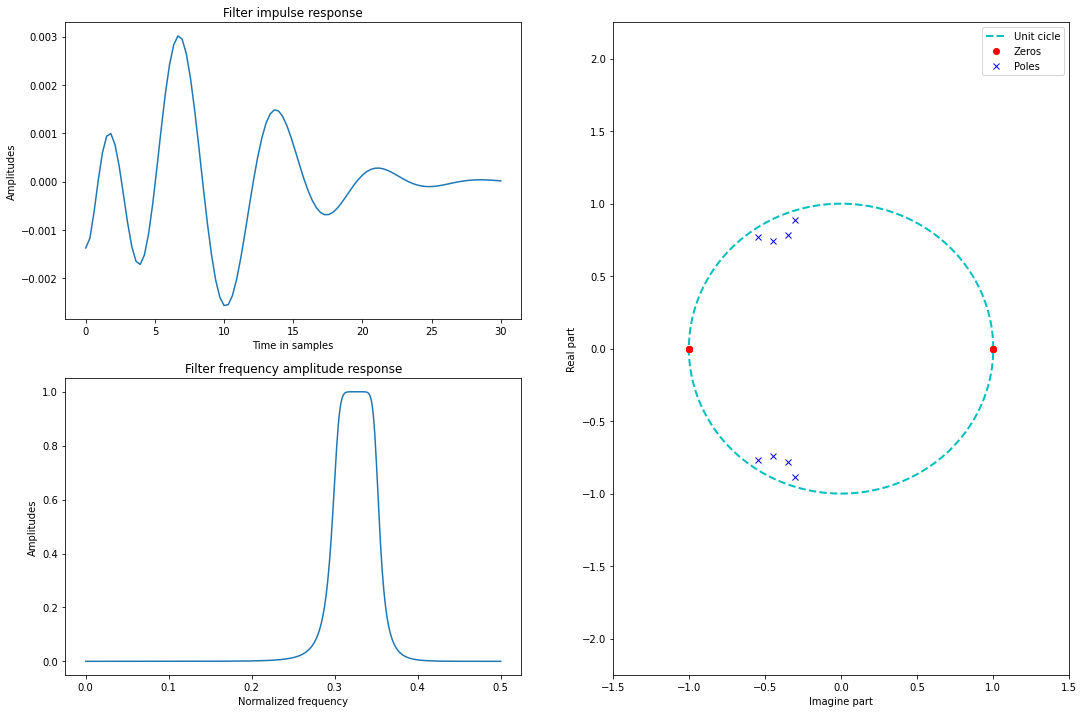


Drawing finished


Drawing begin, filter is unstable. 



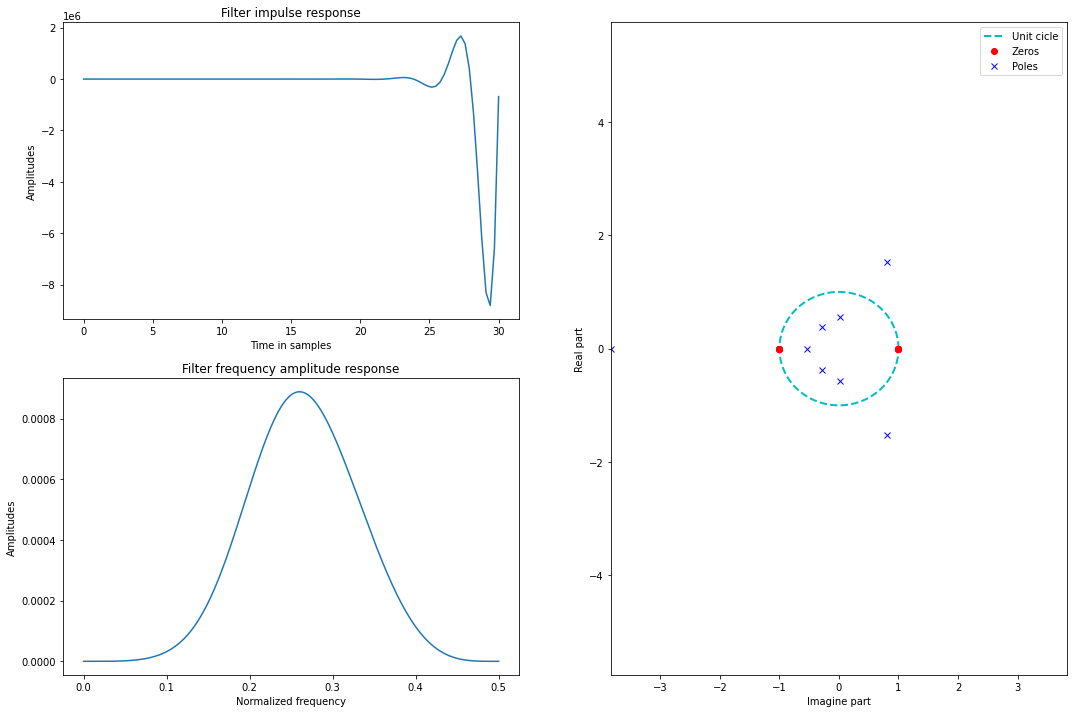


Drawing finished



In [7]:
nsamples = 30

# Stable filter design
no1, de1 = sig.iirfilter(4, [0.6, 0.7], btype = 'bandpass')

# Unstable filter design
no2 = no1.copy()
de2 = de1.copy()

# Changing one coefficient of filter
a1 = -0.001
de2[2] = a1

# Drawing stable filter characteristics
draw_IIR(de1, no1, nsamples)

# Drawing unstable filter characteristics
draw_IIR(de2, no2, nsamples)


### Question

- What is the difference between the impulse responses of these two filters?
- What is the differences in location of poles and zeros?
- What would happen if we applied these filters to audio?

- A więc odpowiedzi impulsowe obu filtrów różnią się tym, że dla stabilnego filtru mamy od razu znaczną odpowiedź impulsową, która z czasem ulega tłumieniu niemalże do zera. Z kolei dla filtru niestabilnego na początku również mamy impulsy jednak są one niewidoczne przez impulsy o znacznie większej wartości pojawiające się dla dalszych wartości czasu.
- W przypadku filtru stabilnego moduł wszystkich biegunów (poles) musi być mniejszy od 1, co oznacza, że bieguny muszą zawierać się w okręgu o promieniu 1. Jeżeli istnieją bieguny o module bliskim 1, układ taki nazywa się układem na granicy stabilności. Nie jest on ani stabilny, ani niestabilny, jego odpowiedź impulsowa ani nie wygasza się, ani nie narasta.
- Jeżeli zastosujemy te filtry to będą one przepuszczać dźwięki o określonych częstotliwościach.

## Practical IIR  design

### Exercise 

- Using [scipy.signal.iirfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html) (or other) function design Butterworth, Chebyshev type I, Chebyshev type II and Eliptic 4th order lowpass filter. Its normalized cutoff frequency should be 0.3. 
- Draw frequency responses of all these filters on one plot. 
- Try to choose the parameters (without changing filter order) of individual filters so that the frequency responses are as similar as possible

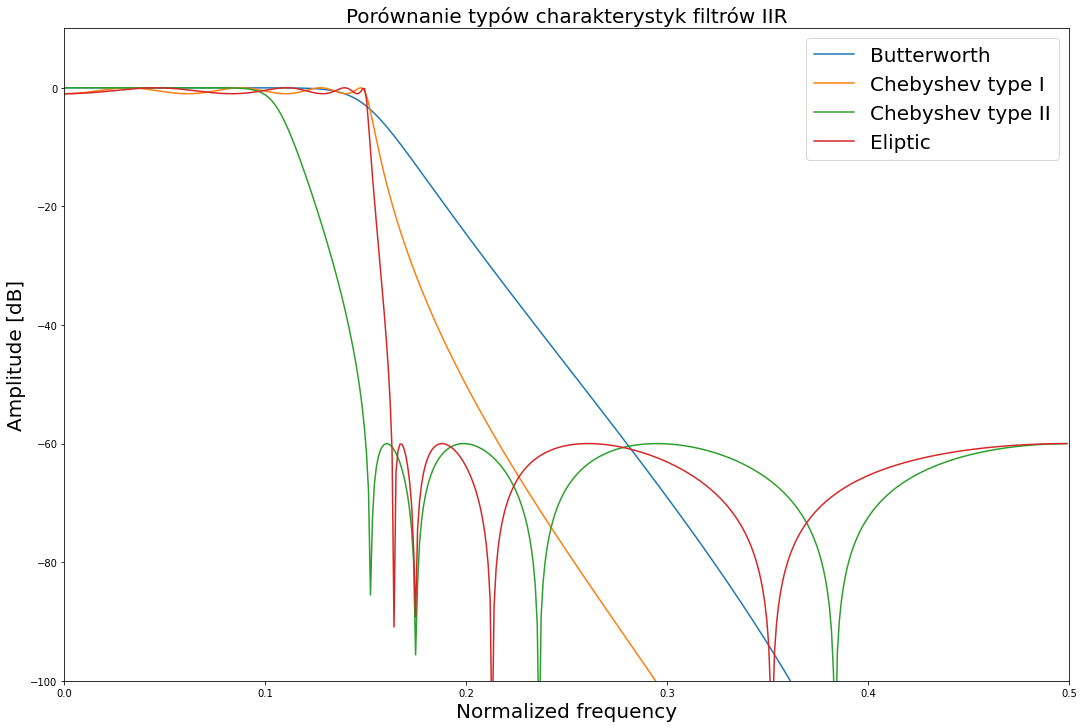

In [8]:
# Butterworth, 4th order, lowpass filter, cutoff frequency 0.3
b_butter, a_butter = sig.iirfilter(8, 0.3, ftype='butter', btype='lowpass')
w, h_butter = sig.freqz(b_butter, a_butter)

# Chebyshev type I, 4th order, lowpass filter, cutoff frequency 0.3
b_cheby1, a_cheby1 = sig.iirfilter(8, 0.3, rp=1, ftype='cheby1', btype='lowpass')
w, h_cheby1 = sig.freqz(b_cheby1, a_cheby1)

# Chebyshev type II, 4th order, lowpass filter, cutoff frequency 0.3
b_cheby2, a_cheby2 = sig.iirfilter(8, 0.3, rs=60, ftype='cheby2', btype='lowpass')
w, h_cheby2 = sig.freqz(b_cheby2, a_cheby2)

# Eliptic, 4th order, lowpass filter, cutoff frequency 0.3
b_ellip, a_ellip = sig.iirfilter(8, 0.3, rp=1, rs=60, ftype='ellip', btype='lowpass')
w, h_ellip = sig.freqz(b_ellip, a_ellip)

# Plot characteristics
plt.figure(figsize = (18,12))
plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_cheby1)), label='Chebyshev type I')
plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_cheby2)), label='Chebyshev type II')
plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_ellip)), label='Eliptic')
plt.legend(fontsize = 20)
plt.xlim(0, 0.5)
plt.ylim(-100, 10)
plt.xlabel('Normalized frequency', fontsize = 20)
plt.ylabel('Amplitude [dB]',fontsize = 20)
plt.title('Porównanie typów charakterystyk filtrów IIR',fontsize = 20)
plt.show()

### Question

- Characterize each type of filter in one sentence (note differences, advantages, disadvantages, tradeoffs).

Filtr Butterwortha posiada maksymalnie płaską charakterystykę w paśmie przepustowym, nie zniekształca więc amplitud składowych w tym paśmie. Pasmo przejściowe jest natomiast bardzo szerokie.
Filtr Czebyszewa typu I dopuszcza zafalowania charakterystyki w paśmie przepustowym. Filtr zniekształca więc w pewnym stopniu amplitudy składowych sygnału w paśmie przepustowym. W zamian poprawia się tłumienie w paśmie zaporowym - szybkość opadania charaterystyki jest większa niż dla filtru Butterwortha. Większy rząd filtru poprawia tłumienie w pasmie zaporowym, ale zwiększa częstotliwość zafalowań w paśmie przepustowym.
Filtr Czebyszewa typu II nakłada ograniczenie na tłumienie w paśmie zaporowym — parametr rs. Tłumienie w paśmie zaporowym jest więc mniejsze niż dla poprzednich filtrów, otrzymujemy zafalowania w paśmie zaporowym, a ponadto pasmo przejściowe "zabiera" część pasma przepustowego. Charakterystyka w paśmie przepustowym jest w przybliżeniu płaska.
Filtr eliptyczny, ma najwęższe pasmo przejściowe spośród wszyskich typów. Ceną za to jest jednak występowanie zafalowań w paśmie przepustowym oraz zaporowym, jak i zmniejszone tłumienie w paśmie zaporowym.

### Exercise
- For AT LEAST two choosen types of filters from previous exercise:
    - Design 2'nd, 6'th and 60'th order filter.
    - Check stability of those filters using your implementation of check_stability function.
    - Draw its frequency responses on one plot 
    - Draw its poles and zeros on the separate plots. 
    
You should end up with 8 plots total. You can use draw_IIR function or its part.


Result of a stability 2 order Eliptic filter is:  True
Result of a stability 6 order Eliptic filter is:  True
Result of a stability 60 order Eliptic filter is:  False
Result of a stability 2 order Chebyshev type II filter is:  True
Result of a stability 6 order Chebyshev type II filter is:  False
Result of a stability 60 order Chebyshev type II filter is:  False


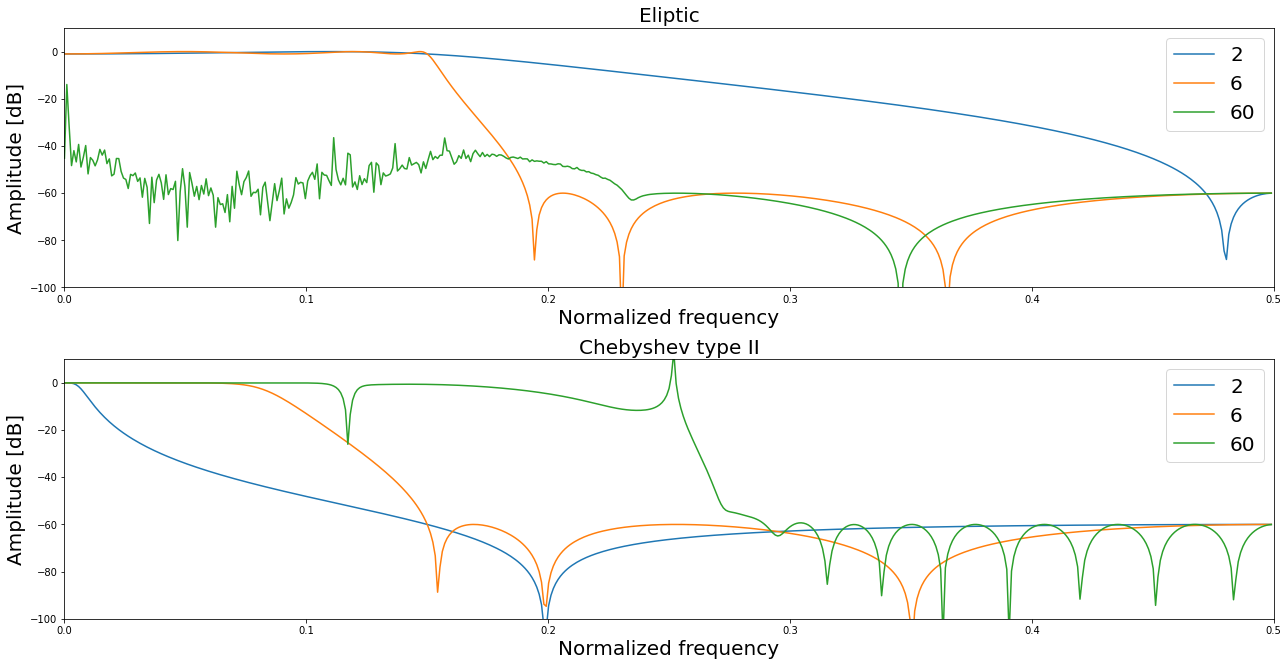

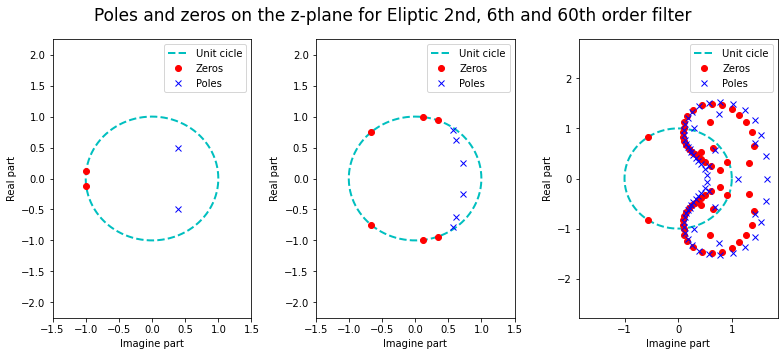

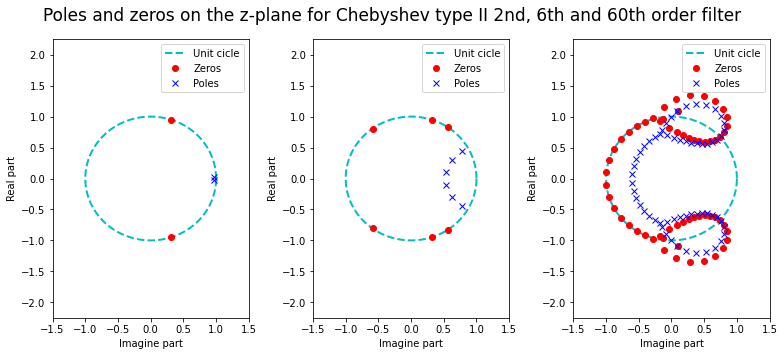

In [9]:
order = [2,6,60]
plt.figure(figsize = (18,18))

# Eliptic, n order, lowpass filter, cutoff frequency 0.3
plt.subplot(4,1,1)
for n in order:
    b_ellip, a_ellip = sig.iirfilter(n, 0.3, rp=1, rs=60, ftype='ellip', btype='lowpass')
    w, h_ellip = sig.freqz(b_ellip, a_ellip)
    plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_ellip)), label=n)
    stable = check_stability(b_ellip,a_ellip)
    print('Result of a stability',n,'order Eliptic filter is: ', stable)
    
plt.legend(fontsize = 20)
plt.xlim(0, 0.5)
plt.ylim(-100, 10)
plt.xlabel('Normalized frequency', fontsize = 20)
plt.ylabel('Amplitude [dB]',fontsize = 20)
plt.title('Eliptic',fontsize = 20)


# Chebyshev type II, n order, lowpass filter, cutoff frequency 0.3
plt.subplot(4,1,2)
for n in order:
    b_cheby2, a_cheby2 = sig.iirfilter(n, 0.3, rs=60, ftype='cheby2', btype='lowpass')
    w, h_cheby2 = sig.freqz(b_cheby2, a_cheby2)
    plt.plot(w/np.pi/2, 20 * np.log10(np.abs(h_cheby2)), label=n)
    stable = check_stability(b_cheby2,a_cheby2)
    print('Result of a stability',n,'order Chebyshev type II filter is: ', stable)

plt.legend(fontsize = 20)
plt.xlim(0, 0.5)
plt.ylim(-100, 10)
plt.xlabel('Normalized frequency', fontsize = 20)
plt.ylabel('Amplitude [dB]',fontsize = 20)
plt.title('Chebyshev type II',fontsize = 20)
plt.tight_layout()


 
# Ploting zeros and poles for Eliptic, n order, lowpass filter, cutoff frequency 0.3
plt.figure(figsize = (11,5))
plt.suptitle('Poles and zeros on the z-plane for Eliptic 2nd, 6th and 60th order filter',fontsize=17)
i=1
for n in order:
    b_ellip, a_ellip = sig.iirfilter(n, 0.3, rp=1, rs=60, ftype='ellip', btype='lowpass')
    zeros, poles, gain = sig.tf2zpk(b_ellip, a_ellip)
    t = np.linspace(0, 2*np.pi, 200)
    axes = np.max((np.max(np.abs(zeros)), np.max(np.abs(poles)), 1.5))
    # Ploting unit circle zeros and poles
    plt.subplot(1,3,i)
    i=i+1
    plt.plot(np.cos(t), np.sin(t), 'c--', linewidth=2)
    plt.plot(np.real(zeros), np.imag(zeros), 'ro', linewidth=4)
    plt.plot(np.real(poles), np.imag(poles), 'bx', linewidth=4)
    plt.xlabel('Imagine part')
    plt.ylabel('Real part')
    plt.legend(('Unit cicle', 'Zeros', 'Poles'))
    plt.xlim(-axes, axes)
    plt.ylim(-1.5*axes, 1.5*axes)
    
plt.tight_layout()   

# Ploting zeros and poles for Chebyshev type II, n order, lowpass filter, cutoff frequency 0.3
plt.figure(figsize = (11,5))
plt.suptitle('Poles and zeros on the z-plane for Chebyshev type II 2nd, 6th and 60th order filter',fontsize=17)
i=1
for n in order:
    b_cheby2, a_cheby2 = sig.iirfilter(n, 0.3, rs=60, ftype='cheby2', btype='lowpass')
    zeros, poles, gain = sig.tf2zpk(b_cheby2, a_cheby2)
    t = np.linspace(0, 2*np.pi, 200)
    axes = np.max((np.max(np.abs(zeros)), np.max(np.abs(poles)), 1.5))
    # Ploting unit circle zeros and poles
    plt.subplot(1,3,i)
    i=i+1
    plt.plot(np.cos(t), np.sin(t), 'c--', linewidth=2)
    plt.plot(np.real(zeros), np.imag(zeros), 'ro', linewidth=4)
    plt.plot(np.real(poles), np.imag(poles), 'bx', linewidth=4)
    plt.xlabel('Imagine part')
    plt.ylabel('Real part')
    plt.legend(('Unit cicle', 'Zeros', 'Poles'))
    plt.xlim(-axes, axes)
    plt.ylim(-1.5*axes, 1.5*axes)

plt.tight_layout()
plt.show()

### Question

- What happens if we use to low order filtration
- What happens if we use to high order filtration

Jak widać na przedstawionych przebiegach gdy użyjemy małych wartości rzędu filtru wydłuża nam się pasmo przejściowe filtru, przez co ciężko jest uzyskać porządany efekt zgodny z częstotliwością odcięcia. Z kolei kiedy zastosujemy filtry wysokiego rzędu otrzymujemy nieoczekiwane wartości amplitudy filtru, w przypadku filtru eliptycznego widzimy, że dla pasma przepustowego występuje tłumienie i mocne zafalowania. Natomiast w przypadku filtru Czebyszewa typu II widać pojawiające się nagłe spadki/skoki amplitudy.